In [2]:
from psycopg2 import connect
from modules.Cobertura_Movel import Cobertura_movel
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values
from cassandra.query import BatchStatement
from cassandra.cluster import Cluster, ProfileManager
import matplotlib.pyplot as plt

In [15]:

def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [16]:
lendo = Cobertura_movel(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\cobertura_movel\Cobertura_Todas.csv")
lendo.tratamento_geral()
df_cobertura_movel = lendo.get_resultado()
print('tratado')
    

tratado


In [17]:
chunked_banda_larga = chunk(df_cobertura_movel, 50000)

In [18]:
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

conexao


In [19]:
for df in chunked_banda_larga:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        # list_postgre = str(list_postgre)[1:-1]
        sql = f"INSERT INTO cobertura_movel (Ano, Operadora , Tecnologia , codigo_setor_censitario , Bairro , tipo_setor , codigo_localidade , nome_localidade , categoria_localidade , localidade_agregadora , codigo_municipio , municipio , uf , regiao , area , domicilios , Moradores , Percentual_cobertura) values %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))

inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo


In [3]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [4]:
dados_tv_assinatura = conect_post.select(query="select t1.*, t2.codigo_setor_censitario, t2.bairro, t2.tipo_setor, t2.codigo_localidade,t2.nome_localidade, t2.categoria_localidade, t2.localidade_agregadora, t3.codigo_municipio, t3.municipio, t3.uf, t3.regiao, t3.area, t4.Moradores, t4.domicilios, t4.Percentual_Cobertura from OperadoraMovel t1 inner join TipoSetorMovel t2 on t2.id_movel = t1.id_movel inner join MunicipioMovel t3 on t3.id_movel = t2.id_movel inner join MoradoresMovel t4 on t4.id_movel = t3.id_movel order by id_movel;")
df_tv_assinatura = pd.DataFrame(dados_tv_assinatura)
a = df_tv_assinatura
print(a)

              0     1      2       3                4   \
0              1  2021  Todas      3G  316550305000007   
1              2  2021  Todas  2G3G4G  316550305000005   
2              3  2021  Todas  2G3G4G  316550305000011   
3              4  2021  Todas      3G  316550305000005   
4              5  2021  Todas    3G4G  316550305000005   
...          ...   ...    ...     ...              ...   
1447221  1447222  2021  Todas      4G  350810805000028   
1447222  1447223  2021  Todas  2G3G4G  350280405000352   
1447223  1447224  2021  Todas      2G  350280405000352   
1447224  1447225  2021  Todas    3G4G  350280405000352   
1447225  1447226  2021  Todas      3G  350280405000352   

                                5       6                  7   \
0        SARDOÁ (todos os setores)   Rural                NaN   
1        SARDOÁ (todos os setores)   Rural                NaN   
2        SARDOÁ (todos os setores)   Rural                NaN   
3        SARDOÁ (todos os setores)   Rural 

In [32]:
query = """
    INSERT INTO cobertura_movel (
        id_movel ,
        Ano ,
        Operadora ,
        Tecnologia ,
        codigo_setor_censitario ,
        Bairro ,
        tipo_setor ,
        codigo_localidade ,
        nome_localidade ,
        categoria_localidade ,
        localidade_agregadora ,
        codigo_municipio ,
        municipio ,
        uf ,
        regiao ,
        area ,
        domicilios ,
        Moradores ,
        Percentual_cobertura 
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [33]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

In [34]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_tv_assinatura, 100)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [35]:
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")

In [42]:
query = "SELECT * FROM cobertura_movel;"
a = session.execute(query) 

In [43]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)   
print(b)

         id_movel   ano             area                               bairro  \
0          302602  2021  0,0963797230796        ALAGOINHAS (todos os setores)   
1          531141  2021  0,0443297651138                           Dona Clara   
2         1416569  2021   0,178373403571  DOMINGOS MARTINS (todos os setores)   
3          693077  2021   0,316339372312                  Distrito Industrial   
4            4317  2021    370,294519279              CUIABÁ (demais setores)   
...           ...   ...              ...                                  ...   
1447221    104823  2021    58,9168182069            VIAMÃO (todos os setores)   
1447222    783760  2021  0,0720808587484                        Sítio Cercado   
1447223   1180941  2021  0,0448924713349         SÃO PAULO (todos os setores)   
1447224   1220022  2021    1,36682014302          CAÇAPAVA (todos os setores)   
1447225   1376241  2021  0,0354774022029              Setor Socioeconômico 20   

        categoria_localidad

In [76]:
b.sort_values(by=['id_movel'], ascending=False, inplace=True)
b['moradores'] = b['moradores'].astype(float, errors = 'raise')
dois_g = b.loc[b["tecnologia"] == '2G']
tres_g = b.loc[b["tecnologia"] == '3G']
quatro_g = b.loc[b["tecnologia"] == '4G']
tres_quatro_g = b.loc[b["tecnologia"] == '3G4G'] 
todos_g = b.loc[b["tecnologia"]== '2G3G4G']

print(b.info())
dataframe_dois_g = b.groupby("regiao").mean()
dataframe_dois_g.reset_index(inplace = True)
dataframe_tres_g = b.groupby("regiao").mean()
dataframe_tres_g.reset_index(inplace = True)
dataframe_quatro_g = b.groupby("regiao").mean()
dataframe_quatro_g.reset_index(inplace = True)
dataframe_tres_quatro_g = b.groupby("regiao").mean()
dataframe_tres_quatro_g.reset_index(inplace = True)
dataframe_todos_g = b.groupby("regiao").mean()
dataframe_todos_g.reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447226 entries, 1390379 to 403952
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id_movel                 1447226 non-null  int64  
 1   ano                      1447226 non-null  int64  
 2   area                     1447226 non-null  object 
 3   bairro                   1447226 non-null  object 
 4   categoria_localidade     1447226 non-null  object 
 5   codigo_localidade        1447226 non-null  object 
 6   codigo_municipio         1447226 non-null  object 
 7   codigo_setor_censitario  1447226 non-null  object 
 8   domicilios               1447226 non-null  object 
 9   localidade_agregadora    1447226 non-null  object 
 10  moradores                1447216 non-null  float64
 11  municipio                1447226 non-null  object 
 12  nome_localidade          1447226 non-null  object 
 13  operadora                1447226 non-

In [81]:
dataframe_tres_g.head()
dataframe_dois_g.head()

,regiao,id_movel,ano,moradores
0,Centro-oeste,487679.462109,2021.0,190.767014
1,Nordeste,480481.020043,2021.0,197.101621
2,Norte,552106.728374,2021.0,213.507837
3,Sudeste,892065.430748,2021.0,187.468496
4,Sul,768916.122614,2021.0,174.650883


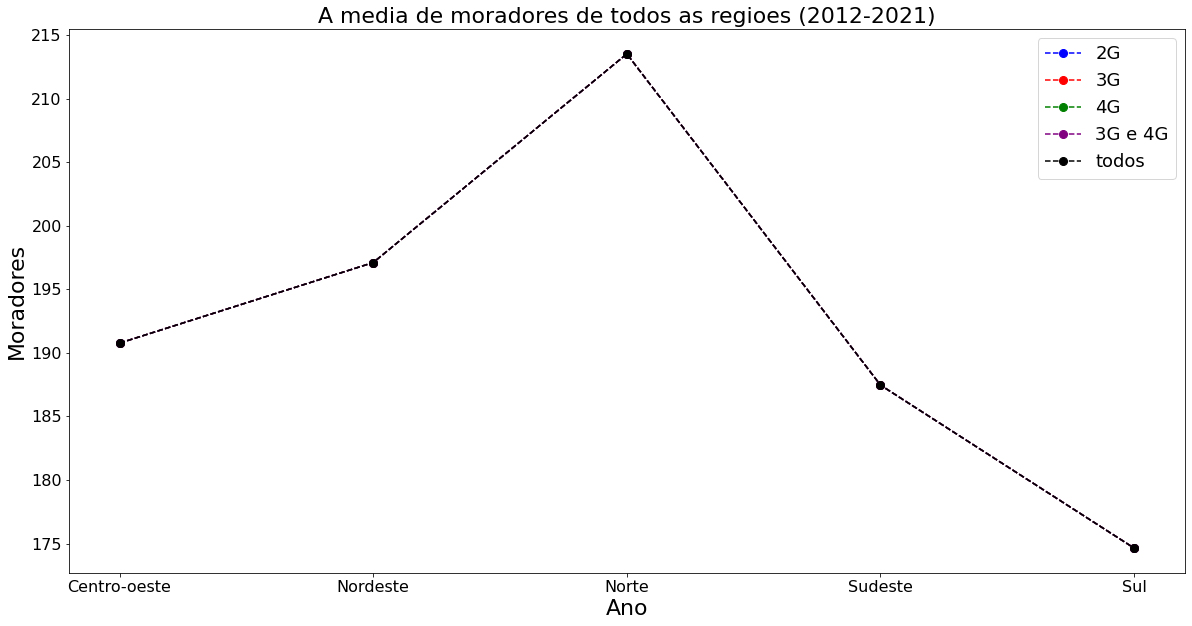

In [78]:

plt.figure(figsize=(20,10))
plt.plot(dataframe_dois_g["regiao"], dataframe_dois_g["moradores"], linestyle='--', marker='o', color = 'blue', markersize = 8)
plt.plot(dataframe_tres_g["regiao"], dataframe_tres_g["moradores"], linestyle='--', marker='o', color = 'red', markersize = 8)
plt.plot(dataframe_quatro_g["regiao"], dataframe_quatro_g["moradores"], linestyle='--', marker='o', color = 'green', markersize = 8)
plt.plot(dataframe_tres_quatro_g["regiao"], dataframe_tres_quatro_g["moradores"], linestyle='--', marker='o', color = 'purple', markersize = 8)
plt.plot(dataframe_todos_g["regiao"], dataframe_todos_g["moradores"], linestyle='--', marker='o', color = 'black', markersize = 8)
plt.title("A media de moradores de todos as regioes (2012-2021)", fontsize=22)
plt.xlabel("Ano", fontsize=22)
plt.ylabel("Moradores", fontsize=22)
plt.legend(['2G', '3G' ,'4G', '3G e 4G', 'todos'], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

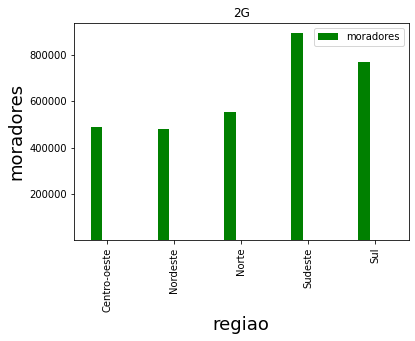

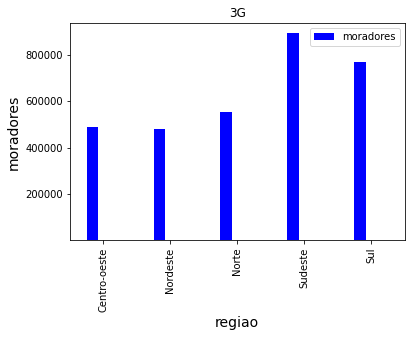

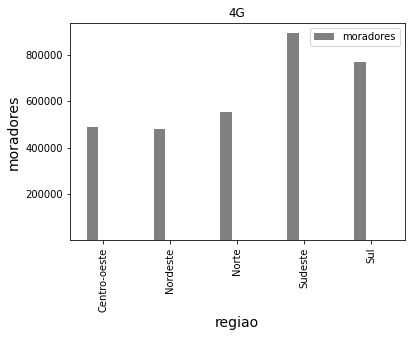

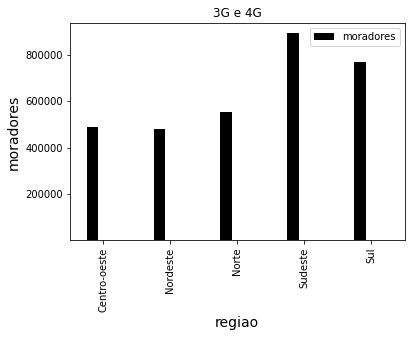

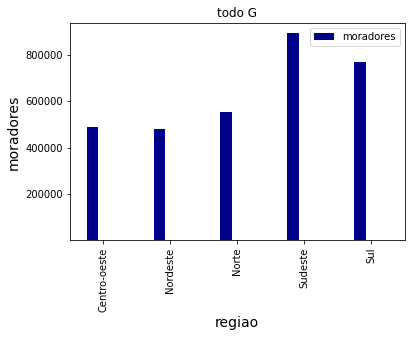

In [86]:
dataframe_dois_g.plot(x='regiao', kind='bar', title='2G',color = 'green')
plt.ylim(100)
plt.xlabel("regiao", fontsize=18)
plt.ylabel("moradores", fontsize=18)
plt.legend(['moradores'])
# dataframe_Cabo_Coxial.plot(x='regiao', kind='bar', title='CABO COXIAL')
# plt.ylim(0,5)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['Acesso'])
dataframe_tres_g.plot(x='regiao', kind='bar', title='3G',color = 'blue')
plt.ylim(100)
plt.xlabel("regiao", fontsize=14)
plt.ylabel("moradores", fontsize=14)
plt.legend(['moradores'])
dataframe_quatro_g.plot(x='regiao', kind='bar', title='4G',color = 'grey')
plt.ylim(100)
plt.xlabel("regiao", fontsize=14)
plt.ylabel("moradores", fontsize=14)
plt.legend(['moradores'])
dataframe_tres_quatro_g.plot(x='regiao', kind='bar', title='3G e 4G',color = 'black')
plt.ylim(100)
plt.xlabel("regiao", fontsize=14)
plt.ylabel("moradores", fontsize=14)
plt.legend(['moradores'])
dataframe_todos_g.plot(x='regiao', kind='bar', title='todo G', color = 'darkblue')
plt.ylim(100)
plt.xlabel("regiao", fontsize=14)
plt.ylabel("moradores", fontsize=14)
plt.legend(['moradores'])